In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


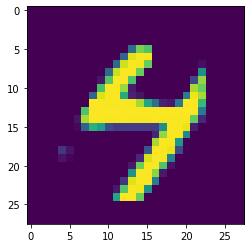

In [73]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[991])


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [77]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [78]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu',bias=False, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3,bias=False, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(8, 1, 1,bias=False, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3,bias=False, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.05))


model.add(Convolution2D(16, 3, 3,bias=False, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.05))


model.add(Convolution2D(16, 3, 3,bias=False, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.05))


model.add(Convolution2D(16, 3, 3,bias=False, activation='relu'))#3
model.add(BatchNormalization())
model.add(Dropout(0.05))


model.add(Convolution2D(10, 4, 4,bias=False,))
model.add(BatchNormalization())
model.add(Dropout(0.05))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu"

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_50 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_50 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_51 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_51 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 24, 24, 8)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), use_bias=False)`


In [79]:

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 12s 192us/step - loss: 0.4157 - acc: 0.9029 - val_loss: 0.0853 - val_acc: 0.9842
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 99us/step - loss: 0.1759 - acc: 0.9554 - val_loss: 0.0543 - val_acc: 0.9883
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 99us/step - loss: 0.1382 - acc: 0.9658 - val_loss: 0.0501 - val_acc: 0.9884
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 100us/step - loss: 0.1163 - acc: 0.9703 - val_loss: 0.0393 - val_acc: 0.9906
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=======

In [80]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.018498290636902674, 0.9947]
